O código abaixo precisa ser executado para conseguir acesso as pastas do drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


O código abaixo precisa ser executado para a maioria das funções funcionar, pois possui recursos que são usados por elas.

Existe uma lista de cursos considerados que são usadas em diversas funções.

Os cursos considerados contém a palavra ‘Engenharia’.

Alguns cursos não devem ser considerados como:
<ul>
  <li>Licenciatura em Ciências Exatas/Habilitação em Matemática </li>
  <li>Licenciatura em Ciências Exatas/Licenciatura em Ciências Exatas - Núcleo Geral</li>
  <li>Licenciatura em Ciências Exatas/Habilitação em Física</li>
  <li>Engenharia Civil/Dupla Formação EESC - IAU</li>
  <li>Engenharia Mecânica/Engenharia Mecânica - Núcleo Geral</li>
  <li>Engenharia Mecânica/Ênfase Mecânica Plena</li>
  <li>Licenciatura em Ciências Exatas/Habilitação em Química</li>
</ul>


In [ ]:
import matplotlib.pyplot as plt
import pandas
import xlrd
import numpy
from enum import Enum
from datetime import datetime, date

# Carregar arquivo
diretorio_e_nome_do_arquivo = '/content/drive/MyDrive/Estagio USP/Tabelas Bases para os Programas/Cópia de [EESC] Ingressantes SISU_FUVEST - 2015-2020.xlsx'
workbook = xlrd.open_workbook(diretorio_e_nome_do_arquivo)
spreadsheet = workbook.sheet_by_index(0)

class EESC(Enum):
  ANO = 0
  CURSO = 1
  TIPO = 2
  IDEN = 3
  ESTADO = 4
  ENCERRAMENTO = 5
  TIPO_ENCERRAMENTO = 6
  BENEFICIO = 7
  REPROVADAS = 8
  APROVADAS = 9
  MEDIA_SUJA = 10
  MEDIA_LIMPA = 11

# função utilizada para retornar certos cursos da quantidade de curso total. Isso é usado em diversas funções. 

def retornar_nomes_dos_cursos_considerados_da_EESC():
  coluna_cursos = spreadsheet.col_values(EESC.CURSO.value)[1:]
  nomes_dos_cursos = list(set(coluna_cursos))
  nomes_dos_cursos_considerados = [curso for curso in nomes_dos_cursos
  if(curso.find('Engenharia') != -1 and curso.find('Habilitação') == -1 
      and curso.find('Plena') == -1 and curso.find('Núcleo') == -1 
      and curso.find('Dupla') == -1)]
  
  return nomes_dos_cursos_considerados

nomes_dos_cursos_considerados_da_EESC = retornar_nomes_dos_cursos_considerados_da_EESC()

def gerar_tabela_para_validar_dados(dicionario_contendo_cabecalho_coluna_e_valores, titulo_da_tabela, transpor_dados_da_tabela):
  dataframe = pandas.DataFrame(data=dicionario_contendo_cabecalho_coluna_e_valores)
  if(transpor_dados_da_tabela):
    dataframe = dataframe.transpose()
  print('\n{}\n'.format(titulo_da_tabela))
  display(dataframe)
  print('')

codigos_de_unidades_e_nomes_de_seus_cursos = {
    '18': nomes_dos_cursos_considerados_da_EESC
}

def tratar_e_retornar_dados_de_alunos_ingressados_em_T_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, data_para_correcao_da_data_de_conclusao):
  T = ano_de_ingresso_dos_alunos

  j = nome_do_curso

  coluna_cursos = spreadsheet.col_values(EESC.CURSO.value)[1:]
  coluna_anos_de_ingresso = spreadsheet.col_values(EESC.ANO.value)[1:]
  coluna_data_de_encerramento = spreadsheet.col_values(EESC.ENCERRAMENTO.value)[1:]
  coluna_tipo_de_encerramento = spreadsheet.col_values(EESC.TIPO_ENCERRAMENTO.value)[1:]

  alunos_ingressados_em_T = []

  for curso, ano_de_ingresso, data_de_encerramento, tipo_de_encerramento in zip(coluna_cursos, coluna_anos_de_ingresso, coluna_data_de_encerramento, coluna_tipo_de_encerramento):
    
    if curso == j and int(ano_de_ingresso) == T:

      if data_de_encerramento != '':

        if type(data_de_encerramento) == float or type(data_de_encerramento) == int:
          data_de_encerramento =  xlrd.xldate.xldate_as_datetime(data_de_encerramento, workbook.datemode).date()
        else:
          data_de_encerramento =  datetime.strptime(data_de_encerramento,'%d/%m/%Y').date()

        if(tipo_de_encerramento.find('Conclusão')!= -1 and 
            data_para_correcao_da_data_de_conclusao != None and 
            data_de_encerramento <= date(data_de_encerramento.year, data_para_correcao_da_data_de_conclusao.month, data_para_correcao_da_data_de_conclusao.day)
        ):
          data_de_encerramento = date(data_de_encerramento.year - 1, 12, 31)

      alunos_ingressados_em_T.append((ano_de_ingresso, data_de_encerramento, tipo_de_encerramento))
 
  return alunos_ingressados_em_T

def tratar_e_retornar_dados_de_alunos_ingressados_em_T_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, codigo_da_unidade, data_para_correcao_da_data_de_conclusao):
  T = ano_de_ingresso_dos_alunos
  
  nomes_dos_cursos_da_unidade = codigos_de_unidades_e_nomes_de_seus_cursos[codigo_da_unidade] # codigos_de_unidades_e_nomes_de_seus_cursos é uma variável global

  coluna_cursos = spreadsheet.col_values(EESC.CURSO.value)[1:]
  coluna_anos_de_ingresso = spreadsheet.col_values(EESC.ANO.value)[1:]
  coluna_data_de_encerramento = spreadsheet.col_values(EESC.ENCERRAMENTO.value)[1:]
  coluna_tipo_de_encerramento = spreadsheet.col_values(EESC.TIPO_ENCERRAMENTO.value)[1:]

  alunos_ingressados_em_T = []

  for curso, ano_de_ingresso, data_de_encerramento, tipo_de_encerramento in zip(coluna_cursos, coluna_anos_de_ingresso, coluna_data_de_encerramento, coluna_tipo_de_encerramento):
    
    if curso in nomes_dos_cursos_da_unidade and int(ano_de_ingresso) == T:
    
      if data_de_encerramento != '':

        if type(data_de_encerramento) == float or type(data_de_encerramento) == int:
          data_de_encerramento =  xlrd.xldate.xldate_as_datetime(data_de_encerramento, workbook.datemode).date()
        else:
          data_de_encerramento =  datetime.strptime(data_de_encerramento,'%d/%m/%Y').date()

        if(tipo_de_encerramento.find('Conclusão')!= -1 and 
            data_para_correcao_da_data_de_conclusao != None and 
            data_de_encerramento <= date(data_de_encerramento.year, data_para_correcao_da_data_de_conclusao.month, data_para_correcao_da_data_de_conclusao.day)
        ):
          data_de_encerramento = date(data_de_encerramento.year - 1, 12, 31)

      alunos_ingressados_em_T.append((ano_de_ingresso, data_de_encerramento, tipo_de_encerramento))
 
  return alunos_ingressados_em_T

###calcular_taxas_de_permanencia_de_varios_anos_para_um_CURSO(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
---
O objetivo da função é calcular a taxa de permanência de cada ano ao longo dos anos para um CURSO.

In [ ]:
def calcular_taxas_de_permanencia_de_varios_anos_para_um_CURSO(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela):

  def calcular_taxa_de_permanencia_de_um_ano_para_um_CURSO(t, alunos_ingressados_em_T):        
    somatoria_IG_do_ano_T = len(alunos_ingressados_em_T)
    somatoria_de_alunos_com_vinculo_ativo_no_ano_t = 0
    somatoria_de_Cur_do_ano_t = None # Não é possivel calcular através do banco de dados fornecido
    somatoria_de_mTr_do_ano_t = None # Não é possivel calcular através do banco de dados fornecido
    somatoria_de_Fal_do_ano_T_ate_ano_t = 0

    for ano_de_ingresso, data_de_encerramento, tipo_de_encerramento in alunos_ingressados_em_T:

      if data_de_encerramento == '':
        somatoria_de_alunos_com_vinculo_ativo_no_ano_t +=1
      else:
        if t < data_de_encerramento.year:
          somatoria_de_alunos_com_vinculo_ativo_no_ano_t +=1
        
        elif tipo_de_encerramento.find('Falecimento')!= -1:
          somatoria_de_Fal_do_ano_T_ate_ano_t+=1

    taxa_de_permanencia_do_ano_t = (somatoria_de_alunos_com_vinculo_ativo_no_ano_t / (somatoria_IG_do_ano_T - somatoria_de_Fal_do_ano_T_ate_ano_t)) * 100

    dados_calculados_do_ano_t = {
    't' : t,
    'taxa_de_permanencia_do_ano_t' : taxa_de_permanencia_do_ano_t,
    'somatoria_de_alunos_com_vinculo_ativo_no_ano_t' : somatoria_de_alunos_com_vinculo_ativo_no_ano_t,
    'somatoria_de_Fal_do_ano_T_ate_ano_t' : somatoria_de_Fal_do_ano_T_ate_ano_t,
    'somatoria_IG_do_ano_T' : somatoria_IG_do_ano_T,
    }

    return dados_calculados_do_ano_t

  #-------------------------Conteúdo da Função Principal ------------------------------
  tS = anos_de_referencia 

  if (data_da_geracao_da_tabela.day < 31 or data_da_geracao_da_tabela.month < 12) and max(tS) >= data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data diferente de 31/12/ano, todo ano de referência deve ser menor que o ano da data de geração da tabela.'}
  
  elif (data_da_geracao_da_tabela.day == 31 and data_da_geracao_da_tabela.month == 12) and max(tS) > data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data igual a 31/12/ano, todo ano de referência deve ser menor ou igual ao ano da data de geração da tabela.'}

  dados_calculados_de_anos = []

  taxas_de_permanencia_de_anos = []

  for t in tS:

    dados_calculados_do_ano_t = calcular_taxa_de_permanencia_de_um_ano_para_um_CURSO(t, alunos_ingressados_em_T)

    dados_calculados_de_anos.append(dados_calculados_do_ano_t)

    taxas_de_permanencia_de_anos.append(dados_calculados_do_ano_t['taxa_de_permanencia_do_ano_t'])

    dados_calculados_de_anos_por_categoria = {
    't' : [],
    'Taxa de Permanência do Ano t (%)' : [] ,
    'Somatória de Alunos com Vínculos Ativos do Ano t' : [] ,
    'Somatória de Alunos Falecidos do Ano T até Ano t' : [],
    'Somatória de Alunos Ingressados em T': []
    }

  for dados_calculados_do_ano_t in dados_calculados_de_anos:

    dados_calculados_de_anos_por_categoria ['t'].append(dados_calculados_do_ano_t['t'])
    dados_calculados_de_anos_por_categoria ['Taxa de Permanência do Ano t (%)'].append(dados_calculados_do_ano_t['taxa_de_permanencia_do_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos com Vínculos Ativos do Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_com_vinculo_ativo_no_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Falecidos do Ano T até Ano t'].append(dados_calculados_do_ano_t['somatoria_de_Fal_do_ano_T_ate_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Ingressados em T'].append(dados_calculados_do_ano_t['somatoria_IG_do_ano_T'])

  gerar_tabela_para_validar_dados(dados_calculados_de_anos_por_categoria, 'Taxa de Permanência dos Alunos', False)

  return {'estado': True, 'resposta': taxas_de_permanencia_de_anos}

###calcular_taxas_de_permanencia_de_varios_anos_para_um_CURSO_VERSAO_2(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
---
O objetivo da função é calcular a taxa de permanência de cada ano ao longo dos anos para um CURSO.


In [ ]:
def calcular_taxas_de_permanencia_de_varios_anos_para_um_CURSO_VERSAO_2(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela):

  def calcular_taxa_de_permanencia_de_um_ano_para_um_CURSO_VERSAO_2(t, alunos_ingressados_em_T, somatoria_de_alunos_com_vinculo_ativo_do_ano_t_menos_1):
    
    somatoria_IG_do_ano_T = len(alunos_ingressados_em_T) 
    somatoria_de_Cur_do_ano_t = None # Não é possivel calcular através do banco de dados fornecido
    somatoria_de_mTr_do_ano_t = None # Não é possivel calcular através do banco de dados fornecido
    somatoria_de_alunos_tranferidos_do_ano_t = 0
    somatoria_de_alunos_desistentes_do_ano_t = 0
    somatoria_de_alunos_formados_do_ano_t = 0
    somatoria_de_Fal_do_ano_t = 0
    somatoria_de_Fal_do_ano_T_ate_t = 0

    for ano_de_ingresso, data_de_encerramento, tipo_de_encerramento in alunos_ingressados_em_T:

      if data_de_encerramento != '':

        if t == data_de_encerramento.year:

          if tipo_de_encerramento.find('Transferência')!= -1:
            somatoria_de_alunos_tranferidos_do_ano_t +=1

          elif (tipo_de_encerramento.find('Abandono 2 semestres sem matrícula')!= -1 or
                tipo_de_encerramento.find('Cancelamento 0 crédito')!= -1 or
                tipo_de_encerramento.find('Cancelamento 0 crédito em dois semestres')!= -1 or
                tipo_de_encerramento.find('Cancelamento menos 20% créd 2 semestres')!= -1 or
                tipo_de_encerramento.find('Cancelamento menos 20% dos créditos')!= -1 or
                tipo_de_encerramento.find('Cancelamento trancamento 4 semestres')!= -1 or
                tipo_de_encerramento.find('Desistência a pedido')!= -1 or
                tipo_de_encerramento.find('Ingressante sem Frequência')!= -1 or
                tipo_de_encerramento.find('Encerramento novo ingresso')!= -1 or
                tipo_de_encerramento.find('Cancelamento outras IES (Lei Federal)')!= -1 or
                tipo_de_encerramento.find('Não cumpriu normas Decreto (PEC-G)')!= -1 or
                tipo_de_encerramento.find('Opção Currículo')!= -1 or
                tipo_de_encerramento.find('Liminar cassada')!= -1):
            
            somatoria_de_alunos_desistentes_do_ano_t +=1
          
          elif (tipo_de_encerramento.find('Conclusão')!= -1 or
                tipo_de_encerramento.find('Término')!= -1):
            
            somatoria_de_alunos_formados_do_ano_t +=1
          
          elif tipo_de_encerramento.find('Falecimento') != -1:
            somatoria_de_Fal_do_ano_t +=1
          
        if t >= data_de_encerramento.year and tipo_de_encerramento.find('Falecimento') != -1:
          somatoria_de_Fal_do_ano_T_ate_t +=1

    somatoria_de_alunos_com_vinculo_ativo_no_ano_t = (somatoria_de_alunos_com_vinculo_ativo_do_ano_t_menos_1
                                                                  - somatoria_de_alunos_tranferidos_do_ano_t
                                                                  - somatoria_de_alunos_desistentes_do_ano_t
                                                                  - somatoria_de_alunos_formados_do_ano_t
                                                                  - somatoria_de_Fal_do_ano_t)
    
    taxa_de_permanencia_do_ano_t = ( somatoria_de_alunos_com_vinculo_ativo_no_ano_t / (somatoria_IG_do_ano_T - somatoria_de_Fal_do_ano_T_ate_t)) * 100 

    dados_calculados_do_ano_t = {
      't' : t,
      'taxa_de_permanencia_do_ano_t' : taxa_de_permanencia_do_ano_t,
      'somatoria_de_alunos_com_vinculo_ativo_no_ano_t' : somatoria_de_alunos_com_vinculo_ativo_no_ano_t,
      'somatoria_de_alunos_tranferidos_do_ano_t' : somatoria_de_alunos_tranferidos_do_ano_t,
      'somatoria_de_alunos_desistentes_do_ano_t' : somatoria_de_alunos_desistentes_do_ano_t,
      'somatoria_de_alunos_formados_do_ano_t' : somatoria_de_alunos_formados_do_ano_t ,
      'somatoria_de_Fal_do_ano_t' : somatoria_de_Fal_do_ano_t,
      'somatoria_de_Fal_do_ano_T_ate_t' : somatoria_de_Fal_do_ano_T_ate_t,
      'somatoria_IG_do_ano_T' : somatoria_IG_do_ano_T
    }

    return dados_calculados_do_ano_t


  #-------------------------Conteúdo da Função Principal ------------------------------

  tS = anos_de_referencia 

  if (data_da_geracao_da_tabela.day < 31 or data_da_geracao_da_tabela.month < 12) and max(tS) >= data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data diferente de 31/12/ano, todo ano de referência deve ser menor que o ano da data de geração da tabela.'}
  
  elif (data_da_geracao_da_tabela.day == 31 and data_da_geracao_da_tabela.month == 12) and max(tS) > data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data igual a 31/12/ano, todo ano de referência deve ser menor ou igual ao ano da data de geração da tabela.'}
    
  dados_calculados_de_anos = []

  taxas_de_permanencia_de_anos = []

  somatoria_de_alunos_com_vinculo_ativo_do_ano_t_menos_1 = len(alunos_ingressados_em_T) # Essa atribuição é feita pois no ano T, não existe t-1

  for t in tS:

    dados_calculados_do_ano_t = calcular_taxa_de_permanencia_de_um_ano_para_um_CURSO_VERSAO_2(t, alunos_ingressados_em_T, somatoria_de_alunos_com_vinculo_ativo_do_ano_t_menos_1)

    dados_calculados_de_anos.append(dados_calculados_do_ano_t)

    taxas_de_permanencia_de_anos.append(dados_calculados_do_ano_t['taxa_de_permanencia_do_ano_t'])

    somatoria_de_alunos_com_vinculo_ativo_do_ano_t_menos_1 = dados_calculados_do_ano_t['somatoria_de_alunos_com_vinculo_ativo_no_ano_t']

    dados_calculados_de_anos_por_categoria = {
      't' : [ ],
      'Taxa de Permanência do Ano t (%)' : [] ,
      'Somatória de Alunos com Vínculo Ativo do Ano t' : [] ,
      'Somatória de Alunos Transferidos do Ano t' : [] ,
      'Somatória de Alunos Desistentes do Ano t' : [] ,
      'Somatória de Alunos Formados do Ano t' : [] ,
      'Somatória de Alunos Falecidos do Ano t' : [],
      'Somatória de Alunos Falecidos do Ano T até Ano t' : [],
      'Somatória de Alunos Ingressados em T': []
    }

  for dados_calculados_do_ano_t in dados_calculados_de_anos:

    dados_calculados_de_anos_por_categoria ['t'].append(dados_calculados_do_ano_t['t'])
    dados_calculados_de_anos_por_categoria ['Taxa de Permanência do Ano t (%)'].append(dados_calculados_do_ano_t['taxa_de_permanencia_do_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos com Vínculo Ativo do Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_com_vinculo_ativo_no_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Transferidos do Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_tranferidos_do_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Desistentes do Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_desistentes_do_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Formados do Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_formados_do_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Falecidos do Ano t'].append(dados_calculados_do_ano_t['somatoria_de_Fal_do_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Falecidos do Ano T até Ano t'].append(dados_calculados_do_ano_t['somatoria_de_Fal_do_ano_T_ate_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Ingressados em T'].append(dados_calculados_do_ano_t['somatoria_IG_do_ano_T'])

  gerar_tabela_para_validar_dados(dados_calculados_de_anos_por_categoria, 'Taxa de Permanência dos Alunos', False)

  return {'estado':True, 'resposta':taxas_de_permanencia_de_anos}
  

###calcular_e_plotar_grafico_de_taxas_de_permanencia_de_varios_anos_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela)
---
O objetivo da função é criar um gráfico para um CURSO contendo a taxa de permanência para cada ano ao longo dos anos. Para isso utiliza a função definida no código anterior para realizar os cálculos.

In [ ]:
def calcular_e_plotar_grafico_de_taxas_de_permanencia_de_varios_anos_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela, data_para_correcao_da_data_de_conclusao):
  
  alunos_ingressados_em_T = tratar_e_retornar_dados_de_alunos_ingressados_em_T_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, data_para_correcao_da_data_de_conclusao)
  
  resposta_da_funcao = calcular_taxas_de_permanencia_de_varios_anos_para_um_CURSO_VERSAO_2(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  
  if resposta_da_funcao['estado'] == False:
    print(resposta_da_funcao['resposta'])
    return

  taxas_de_permanencia_de_anos = resposta_da_funcao['resposta']

  figure = plt.figure(figsize = (9,6))
  axe = figure.add_axes([0,0,1,1])
  axe.plot(anos_de_referencia, taxas_de_permanencia_de_anos, 'D-b')
  axe.set_xlabel('Anos')
  axe.set_ylabel('Taxas de Permanência de Anos')
  axe.set_title('Gráfico de Taxas de Permanência de Anos do Curso de '+nome_do_curso)

  incremento_x = (axe.get_xlim()[1] - axe.get_xlim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo x, proporcional ao tamanho do eixo X
  incremento_y = (axe.get_ylim()[1] - axe.get_ylim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo y, proporcional ao tamanho do eixo Y

  # Utilizando função text do módulo pyplot para inserir textos em coordenadas no gráfico.
  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_permanencia_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))

  plt.show()

In [ ]:
#Testes
#print(nomes_dos_cursos_considerados_da_EESC)
for curso in nomes_dos_cursos_considerados_da_EESC:
  calcular_e_plotar_grafico_de_taxas_de_permanencia_de_varios_anos_para_um_CURSO(2015, curso, [2015,2016,2017,2018,2019,2020], 
                                                                                 data_da_geracao_da_tabela = date(2021,4,21), 
                                                                                 data_para_correcao_da_data_de_conclusao = date(9999,5,31))


###calcular_taxas_de_conclusao_acumulada_de_varios_anos_para_um_CURSO(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
---
O objetivo da função é calcular a taxa de conclusão acumulada de cada ano ao longo dos anos para um CURSO.

In [ ]:
def calcular_taxas_de_conclusao_acumulada_de_varios_anos_para_um_CURSO(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela):

  def calcular_taxa_de_conclusao_acumulada_de_um_ano_para_um_CURSO(t, alunos_ingressados_em_T):
    
    somatoria_IG_do_ano_T = len(alunos_ingressados_em_T)
    somatoria_de_alunos_formados_do_ano_T_ate_ano_t = 0
    somatoria_de_Fal_do_ano_T_ate_ano_t = 0 

    for ano_de_ingresso, data_de_encerramento, tipo_de_encerramento in alunos_ingressados_em_T:

      if data_de_encerramento != '':

        if t >= data_de_encerramento.year:

          if (tipo_de_encerramento.find('Conclusão')!= -1 or
                tipo_de_encerramento.find('Término')!= -1):
                  somatoria_de_alunos_formados_do_ano_T_ate_ano_t +=1
          
          elif tipo_de_encerramento.find('Falecimento') != -1:
            somatoria_de_Fal_do_ano_T_ate_ano_t +=1

    taxa_de_conclusao_acumulada_do_ano_T_te_ano_t = ( somatoria_de_alunos_formados_do_ano_T_ate_ano_t 
    / ( somatoria_IG_do_ano_T - somatoria_de_Fal_do_ano_T_ate_ano_t ) ) * 100

    dados_calculados_do_ano_t = {
    't' : t,
    'taxa_de_conclusao_acumulada_do_ano_T_te_ano_t' : taxa_de_conclusao_acumulada_do_ano_T_te_ano_t,
    'somatoria_de_alunos_formados_do_ano_T_ate_ano_t' : somatoria_de_alunos_formados_do_ano_T_ate_ano_t,
    'somatoria_de_Fal_do_ano_T_ate_ano_t' : somatoria_de_Fal_do_ano_T_ate_ano_t,
    'somatoria_IG_do_ano_T' : somatoria_IG_do_ano_T
    }
    return dados_calculados_do_ano_t

  #-------------------------Conteúdo da Função Principal ------------------------------
  tS = anos_de_referencia
  
  if(data_da_geracao_da_tabela.day < 31 or data_da_geracao_da_tabela.month < 12) and max(tS) >= data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data diferente de 31/12/ano, todo ano de referência deve ser menor que o ano da data de geração da tabela.'}
  
  elif (data_da_geracao_da_tabela.day == 31 and data_da_geracao_da_tabela.month == 12) and max(tS) > data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data igual a 31/12/ano, todo ano de referência deve ser menor ou igual ao ano da data de geração da tabela.'}

  dados_calculados_de_anos = []

  taxas_de_conclusao_acumulada_de_anos = []

  for t in tS:

    dados_calculados_do_ano_t = calcular_taxa_de_conclusao_acumulada_de_um_ano_para_um_CURSO(t, alunos_ingressados_em_T)

    dados_calculados_de_anos.append(dados_calculados_do_ano_t)

    taxas_de_conclusao_acumulada_de_anos.append(dados_calculados_do_ano_t['taxa_de_conclusao_acumulada_do_ano_T_te_ano_t'])

  dados_calculados_de_anos_por_categoria = { #Essa variável é utilizada somente numa função externa para comparar aos dados da tabela já feita
    't' : [ ] ,
    'Taxa de Conclusão Acumulada do Ano T até Ano t (%)' : [] ,
    'Somatória de Alunos Formados do Ano T ate Ano t' : [] ,
    'Somatória de Alunos Falecidos do Ano T até Ano t' : [],
    'Somatória de Alunos Ingressados em T': []
  }

  for dados_calculados_do_ano_t in dados_calculados_de_anos:

    dados_calculados_de_anos_por_categoria ['t'].append(dados_calculados_do_ano_t['t'])
    dados_calculados_de_anos_por_categoria ['Taxa de Conclusão Acumulada do Ano T até Ano t (%)'].append(dados_calculados_do_ano_t['taxa_de_conclusao_acumulada_do_ano_T_te_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Formados do Ano T ate Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_formados_do_ano_T_ate_ano_t'])      
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Falecidos do Ano T até Ano t'].append(dados_calculados_do_ano_t['somatoria_de_Fal_do_ano_T_ate_ano_t']) 
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Ingressados em T'].append(dados_calculados_do_ano_t['somatoria_IG_do_ano_T']) 
  
  gerar_tabela_para_validar_dados(dados_calculados_de_anos_por_categoria, 'Taxa de Conclusão Acumulada dos Alunos', False)

  return {'estado':True, 'resposta': taxas_de_conclusao_acumulada_de_anos} 

###calcular_e_plotar_grafico_de_taxas_de_conclusao_acumulada_de_varios_anos_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela)
---
O objetivo da função é criar um gráfico para um CURSO contendo a taxa de conclusão acumulada para cada ano ao longo dos anos. Para isso utiliza a função definida no código anterior para realizar os cálculos.

In [ ]:
def calcular_e_plotar_grafico_de_taxas_de_conclusao_acumulada_de_varios_anos_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela, data_para_correcao_da_data_de_conclusao):
  alunos_ingressados_em_T = tratar_e_retornar_dados_de_alunos_ingressados_em_T_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, data_para_correcao_da_data_de_conclusao)
  
  resposta_da_funcao = calcular_taxas_de_conclusao_acumulada_de_varios_anos_para_um_CURSO(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  
  if resposta_da_funcao['estado'] == False:
    print(resposta_da_funcao['resposta'])
    return

  taxas_de_conclusao_acumulada_de_anos = resposta_da_funcao['resposta']

  figure = plt.figure(figsize = (9,6))
  axe = figure.add_axes([0,0,1,1])
  axe.plot(anos_de_referencia, taxas_de_conclusao_acumulada_de_anos, 's-C1')
  axe.set_xlabel('Anos')
  axe.set_ylabel('Taxas de Conclusão Acumulada de Anos')
  axe.set_title('Gráfico de Taxas de Conclusão Acumulada de Anos do Curso de '+nome_do_curso)

  incremento_x = (axe.get_xlim()[1] - axe.get_xlim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo x, proporcional ao tamanho do eixo X
  incremento_y = (axe.get_ylim()[1] - axe.get_ylim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo y, proporcional ao tamanho do eixo Y

  # Utilizando função text do módulo pyplot para inserir textos em coordenadas no gráfico.
  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_conclusao_acumulada_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))

  plt.show()

In [ ]:
#print(nomes_dos_cursos_considerados_da_EESC)

calcular_e_plotar_grafico_de_taxas_de_conclusao_acumulada_de_varios_anos_para_um_CURSO(2015, 'Engenharia Mecânica/Engenharia Mecânica', [2015,2016,2017,2018,2019,2020], date.fromisoformat('2021-04-21'))  

###calcular_taxas_de_desistencia_acumulada_de_varios_anos_para_um_CURSO(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
---
O objetivo da função é calcular a taxa de desistência acumulada de cada ano ao longo dos anos para um CURSO.

In [ ]:
def calcular_taxas_de_desistencia_acumulada_de_varios_anos_para_um_CURSO(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela):

  def calcular_taxa_de_desistencia_acumulada_de_um_ano_para_um_CURSO(t, alunos_ingressados_em_T):
    
    somatoria_IG_do_ano_T = len(alunos_ingressados_em_T) 
    
    somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t = 0

    somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t = 0

    somatoria_de_Fal_do_ano_T_ate_t = 0

    for ano_de_ingresso, data_de_encerramento, tipo_de_encerramento in alunos_ingressados_em_T:

      if data_de_encerramento != '':

        if t >= data_de_encerramento.year:

          if tipo_de_encerramento.find('Transferência')!= -1:
            somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t +=1

          elif (tipo_de_encerramento.find('Abandono 2 semestres sem matrícula')!= -1 or
                tipo_de_encerramento.find('Cancelamento 0 crédito')!= -1 or
                tipo_de_encerramento.find('Cancelamento 0 crédito em dois semestres')!= -1 or
                tipo_de_encerramento.find('Cancelamento menos 20% créd 2 semestres')!= -1 or
                tipo_de_encerramento.find('Cancelamento menos 20% dos créditos')!= -1 or
                tipo_de_encerramento.find('Cancelamento trancamento 4 semestres')!= -1 or
                tipo_de_encerramento.find('Desistência a pedido')!= -1 or
                tipo_de_encerramento.find('Ingressante sem Frequência')!= -1 or
                tipo_de_encerramento.find('Encerramento novo ingresso')!= -1 or
                tipo_de_encerramento.find('Cancelamento outras IES (Lei Federal)')!= -1 or
                tipo_de_encerramento.find('Não cumpriu normas Decreto (PEC-G)')!= -1 or
                tipo_de_encerramento.find('Opção Currículo')!= -1 or
                tipo_de_encerramento.find('Liminar cassada')!= -1):
            
            somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t +=1
          
          elif tipo_de_encerramento.find('Falecimento') != -1:
            somatoria_de_Fal_do_ano_T_ate_t +=1
          
    taxa_de_desistencia_acumulada_do_ano_T_ate_ano_t = ( ( somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t + somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t )
    / ( somatoria_IG_do_ano_T - somatoria_de_Fal_do_ano_T_ate_t  ) ) * 100
          
    dados_calculados_do_ano_t = {
      't' : t,
      'taxa_de_desistencia_acumulada_do_ano_T_ate_ano_t' : taxa_de_desistencia_acumulada_do_ano_T_ate_ano_t ,
      'somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t' : somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t ,
      'somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t' : somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t,
      'somatoria_de_Fal_do_ano_T_ate_t' : somatoria_de_Fal_do_ano_T_ate_t,
      'somatoria_IG_do_ano_T' : somatoria_IG_do_ano_T,
    }

    return dados_calculados_do_ano_t

  #-------------------------Conteúdo da Função Principal ------------------------------
  
  tS = anos_de_referencia

  if(data_da_geracao_da_tabela.day < 31 or data_da_geracao_da_tabela.month < 12) and max(tS) >= data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data diferente de 31/12/ano, todo ano de referência deve ser menor que o ano da data de geração da tabela.'}
  
  elif (data_da_geracao_da_tabela.day == 31 and data_da_geracao_da_tabela.month == 12) and max(tS) > data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data igual a 31/12/ano, todo ano de referência deve ser menor ou igual ao ano da data de geração da tabela.'}

  dados_calculados_de_anos = []

  taxas_de_desistencia_acumulada_de_anos = []

  for t in tS:

    dados_calculados_do_ano_t = calcular_taxa_de_desistencia_acumulada_de_um_ano_para_um_CURSO(t, alunos_ingressados_em_T)

    dados_calculados_de_anos.append(dados_calculados_do_ano_t)

    taxas_de_desistencia_acumulada_de_anos.append(dados_calculados_do_ano_t['taxa_de_desistencia_acumulada_do_ano_T_ate_ano_t'])

  dados_calculados_de_anos_por_categoria = {
    't' : [ ],
    'Taxa de Desistência Acumulada do Ano T até Ano t (%)' : [] ,
    'Somatória de Alunos Transferidos do Ano T até Ano t' : [] ,
    'Somatória de Alunos Desistentes do Ano T até Ano t' : [] ,
    'Somatória de Alunos Falecidos do Ano T até Ano t' : [],
    'Somatória de Alunos Ingressados em T': []
  }

  for dados_calculados_do_ano_t in dados_calculados_de_anos:

    dados_calculados_de_anos_por_categoria ['t'].append(dados_calculados_do_ano_t['t'])
    dados_calculados_de_anos_por_categoria ['Taxa de Desistência Acumulada do Ano T até Ano t (%)'].append(dados_calculados_do_ano_t['taxa_de_desistencia_acumulada_do_ano_T_ate_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Transferidos do Ano T até Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Desistentes do Ano T até Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Falecidos do Ano T até Ano t'].append(dados_calculados_do_ano_t['somatoria_de_Fal_do_ano_T_ate_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Ingressados em T'].append(dados_calculados_do_ano_t['somatoria_IG_do_ano_T'])
    
  gerar_tabela_para_validar_dados(dados_calculados_de_anos_por_categoria, 'Taxa de Desistência Acumulada dos Alunos', False)

  return {'estado':True, 'resposta':taxas_de_desistencia_acumulada_de_anos}


###calcular_e_plotar_grafico_de_taxas_de_desistencia_acumulada_de_varios_anos_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela)
---
O objetivo da função é criar um gráfico para um CURSO contendo a taxa de desistencia acumulada para cada ano ao longo dos anos. Para isso utiliza a função definida no código anterior para realizar os cálculos.

In [ ]:
def calcular_e_plotar_grafico_de_taxas_de_desistencia_acumulada_de_varios_anos_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela, data_para_correcao_da_data_de_conclusao):

  alunos_ingressados_em_T = tratar_e_retornar_dados_de_alunos_ingressados_em_T_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, data_para_correcao_da_data_de_conclusao)
  
  resposta_da_funcao = calcular_taxas_de_desistencia_acumulada_de_varios_anos_para_um_CURSO(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  
  if resposta_da_funcao['estado'] == False:
    print(resposta_da_funcao['resposta'])
    return

  taxas_de_desistencia_acumulada_de_anos = resposta_da_funcao['resposta']

  figure = plt.figure(figsize = (9,6))
  axe = figure.add_axes([0,0,1,1])
  axe.plot(anos_de_referencia, taxas_de_desistencia_acumulada_de_anos, '^-r')
  axe.set_xlabel('Anos')
  axe.set_ylabel('Taxas de Desistência Acumulada de Anos')
  axe.set_title('Gráfico de Taxas de Desistência Acumulada de Anos do Curso de '+nome_do_curso)

  incremento_x = (axe.get_xlim()[1] - axe.get_xlim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo x, proporcional ao tamanho do eixo X
  incremento_y = (axe.get_ylim()[1] - axe.get_ylim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo y, proporcional ao tamanho do eixo Y

  # Utilizando função text do módulo pyplot para inserir textos em coordenadas no gráfico.
  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_desistencia_acumulada_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))

  plt.show()

In [ ]:
#print(nomes_dos_cursos_considerados_da_EESC)
for curso in nomes_dos_cursos_considerados_da_EESC:
  calcular_e_plotar_grafico_de_taxas_de_desistencia_acumulada_de_varios_anos_para_um_CURSO(2015, curso, [2015,2016,2017,2018,2019,2020],
                                                                                 data_da_geracao_da_tabela = date(2021,4,21), 
                                                                                 data_para_correcao_da_data_de_conclusao = date(9999,5,31))  

###calcular_e_plotar_grafico_de_indicadores_de_fluxo_de_varios_anos_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela)
---
O objetivo da função é criar um gráfico para um CURSO contendo a taxa de permanência, a taxa de conclusão acumulada e a taxa de desistência acumulada para cada ano ao longo dos anos.

In [ ]:
def calcular_e_plotar_grafico_de_indicadores_de_fluxo_de_varios_anos_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela, data_para_correcao_da_data_de_conclusao):
  
  alunos_ingressados_em_T = tratar_e_retornar_dados_de_alunos_ingressados_em_T_para_um_CURSO(ano_de_ingresso_dos_alunos, nome_do_curso, data_para_correcao_da_data_de_conclusao)
  
  resposta_da_calcular_TAP = calcular_taxas_de_permanencia_de_varios_anos_para_um_CURSO(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  resposta_da_calcular_TCA = calcular_taxas_de_conclusao_acumulada_de_varios_anos_para_um_CURSO(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  resposta_da_calcular_TDA = calcular_taxas_de_desistencia_acumulada_de_varios_anos_para_um_CURSO(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  
  if resposta_da_calcular_TAP['estado'] == False:
    print(resposta_da_calcular_TAP['resposta'])
    return
  if resposta_da_calcular_TCA['estado'] == False:
    print(resposta_da_calcular_TCA['resposta'])
    return
  if resposta_da_calcular_TDA['estado'] == False:
    print(resposta_da_calcular_TDA['resposta'])
    return

  taxas_de_permanencia_de_anos = resposta_da_calcular_TAP['resposta']
  
  taxas_de_conclusao_acumulada_de_anos = resposta_da_calcular_TCA['resposta']
  
  taxas_de_desistencia_acumulada_de_anos = resposta_da_calcular_TDA['resposta']

  figure = plt.figure(figsize = (9,6))
  axe = figure.add_axes([0,0,1,1])

  axe.plot(anos_de_referencia, taxas_de_permanencia_de_anos, 'D-b', label = "Taxa de Permanência de Anos")
  axe.plot(anos_de_referencia, taxas_de_conclusao_acumulada_de_anos, 's-C1', label = 'Taxa de Conclusão Acumulada de Anos')
  axe.plot(anos_de_referencia, taxas_de_desistencia_acumulada_de_anos, '^-r', label = 'Taxa de Desistência Acumulada de Anos')

  axe.set_xlabel('Anos')
  axe.set_ylabel('Indicadores de Fluxo de Anos')
  axe.set_title('Gráfico Indicadores de Fluxo de Anos do Curso de '+nome_do_curso)

  incremento_x = (axe.get_xlim()[1] - axe.get_xlim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo x, proporcional ao tamanho do eixo X
  incremento_y = (axe.get_ylim()[1] - axe.get_ylim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo y, proporcional ao tamanho do eixo Y

  # Utilizando função text do módulo pyplot para inserir textos em coordenadas no gráfico.
  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_permanencia_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))
  
  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_conclusao_acumulada_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))

  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_desistencia_acumulada_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))

  #plt.legend()
  plt.show()


Taxa de Permanência dos Alunos



,t,Taxa de Permanência do Ano t (%),Somatória de Alunos com Vínculos Ativos do Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,100.000000,61,0,61
1,2016,90.163934,55,0,61
2,2017,81.967213,50,0,61
3,2018,72.131148,44,0,61
4,2019,44.262295,27,0,61
5,2020,19.672131,12,0,61




Taxa de Conclusão Acumulada dos Alunos



,t,Taxa de Conclusão Acumulada do Ano T até Ano t (%),Somatória de Alunos Formados do Ano T ate Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,61
1,2016,0.000000,0,0,61
2,2017,0.000000,0,0,61
3,2018,0.000000,0,0,61
4,2019,21.311475,13,0,61
5,2020,45.901639,28,0,61




Taxa de Desistência Acumulada dos Alunos



,t,Taxa de Desistência Acumulada do Ano T até Ano t (%),Somatória de Alunos Transferidos do Ano T até Ano t,Somatória de Alunos Desistentes do Ano T até Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,0,61
1,2016,9.836066,4,2,0,61
2,2017,18.032787,5,6,0,61
3,2018,27.868852,6,11,0,61
4,2019,34.426230,6,15,0,61
5,2020,34.426230,6,15,0,61


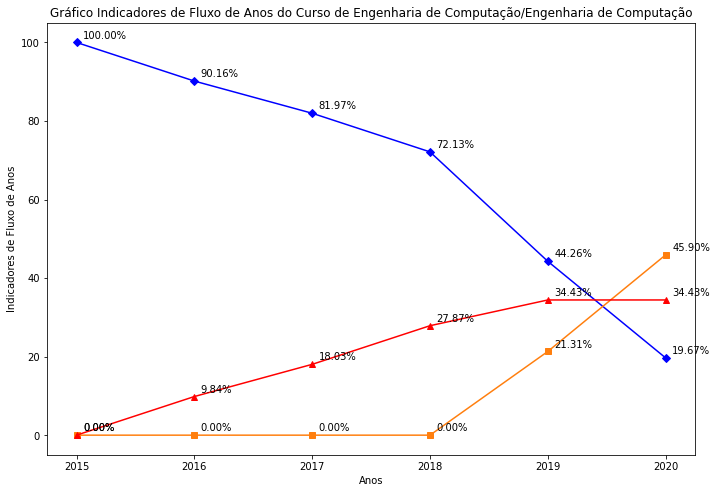


Taxa de Permanência dos Alunos



,t,Taxa de Permanência do Ano t (%),Somatória de Alunos com Vínculos Ativos do Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,96.8750,62,0,64
1,2016,95.3125,61,0,64
2,2017,89.0625,57,0,64
3,2018,89.0625,57,0,64
4,2019,68.7500,44,0,64
5,2020,35.9375,23,0,64




Taxa de Conclusão Acumulada dos Alunos



,t,Taxa de Conclusão Acumulada do Ano T até Ano t (%),Somatória de Alunos Formados do Ano T ate Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.0000,0,0,64
1,2016,0.0000,0,0,64
2,2017,0.0000,0,0,64
3,2018,0.0000,0,0,64
4,2019,20.3125,13,0,64
5,2020,51.5625,33,0,64




Taxa de Desistência Acumulada dos Alunos



,t,Taxa de Desistência Acumulada do Ano T até Ano t (%),Somatória de Alunos Transferidos do Ano T até Ano t,Somatória de Alunos Desistentes do Ano T até Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,3.1250,0,2,0,64
1,2016,4.6875,0,3,0,64
2,2017,10.9375,1,6,0,64
3,2018,10.9375,1,6,0,64
4,2019,10.9375,1,6,0,64
5,2020,12.5000,1,7,0,64


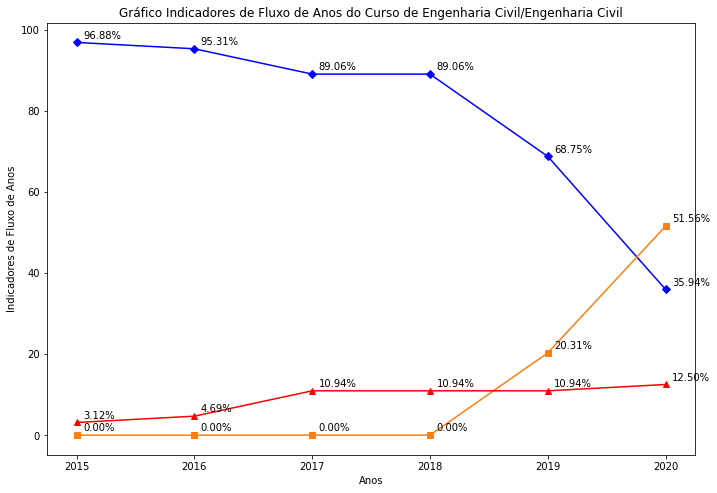


Taxa de Permanência dos Alunos



,t,Taxa de Permanência do Ano t (%),Somatória de Alunos com Vínculos Ativos do Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,93.103448,54,0,58
1,2016,86.206897,50,0,58
2,2017,79.310345,46,0,58
3,2018,74.137931,43,0,58
4,2019,63.793103,37,0,58
5,2020,27.586207,16,0,58




Taxa de Conclusão Acumulada dos Alunos



,t,Taxa de Conclusão Acumulada do Ano T até Ano t (%),Somatória de Alunos Formados do Ano T ate Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,58
1,2016,0.000000,0,0,58
2,2017,0.000000,0,0,58
3,2018,0.000000,0,0,58
4,2019,10.344828,6,0,58
5,2020,46.551724,27,0,58




Taxa de Desistência Acumulada dos Alunos



,t,Taxa de Desistência Acumulada do Ano T até Ano t (%),Somatória de Alunos Transferidos do Ano T até Ano t,Somatória de Alunos Desistentes do Ano T até Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,6.896552,1,3,0,58
1,2016,13.793103,4,4,0,58
2,2017,20.689655,7,5,0,58
3,2018,25.862069,7,8,0,58
4,2019,25.862069,7,8,0,58
5,2020,25.862069,7,8,0,58


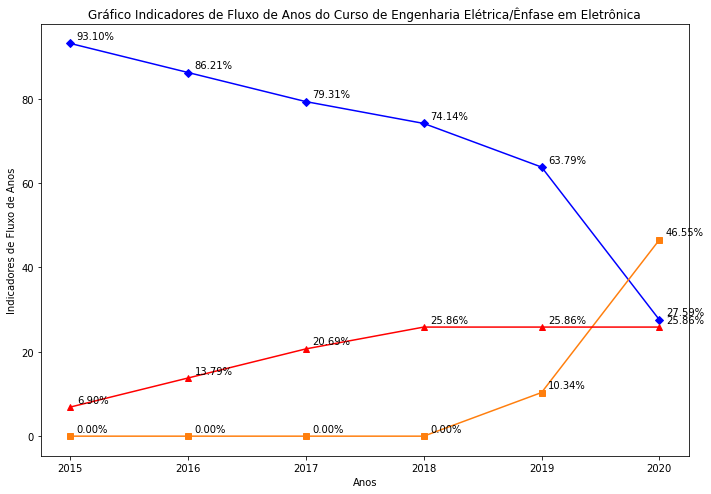


Taxa de Permanência dos Alunos



,t,Taxa de Permanência do Ano t (%),Somatória de Alunos com Vínculos Ativos do Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,100.000000,51,0,51
1,2016,98.039216,50,0,51
2,2017,92.156863,47,0,51
3,2018,86.274510,44,0,51
4,2019,74.509804,38,0,51
5,2020,45.098039,23,0,51




Taxa de Conclusão Acumulada dos Alunos



,t,Taxa de Conclusão Acumulada do Ano T até Ano t (%),Somatória de Alunos Formados do Ano T ate Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,51
1,2016,0.000000,0,0,51
2,2017,1.960784,1,0,51
3,2018,3.921569,2,0,51
4,2019,11.764706,6,0,51
5,2020,41.176471,21,0,51




Taxa de Desistência Acumulada dos Alunos



,t,Taxa de Desistência Acumulada do Ano T até Ano t (%),Somatória de Alunos Transferidos do Ano T até Ano t,Somatória de Alunos Desistentes do Ano T até Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,0,51
1,2016,1.960784,1,0,0,51
2,2017,5.882353,1,2,0,51
3,2018,9.803922,1,4,0,51
4,2019,13.725490,1,6,0,51
5,2020,13.725490,1,6,0,51


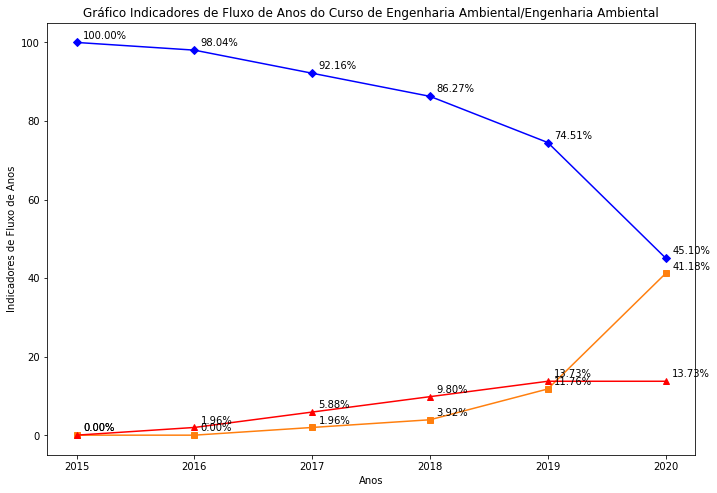


Taxa de Permanência dos Alunos



,t,Taxa de Permanência do Ano t (%),Somatória de Alunos com Vínculos Ativos do Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,98.076923,51,0,52
1,2016,98.076923,51,0,52
2,2017,94.230769,49,0,52
3,2018,90.384615,47,0,52
4,2019,71.153846,37,0,52
5,2020,38.461538,20,0,52




Taxa de Conclusão Acumulada dos Alunos



,t,Taxa de Conclusão Acumulada do Ano T até Ano t (%),Somatória de Alunos Formados do Ano T ate Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,52
1,2016,0.000000,0,0,52
2,2017,0.000000,0,0,52
3,2018,0.000000,0,0,52
4,2019,17.307692,9,0,52
5,2020,50.000000,26,0,52




Taxa de Desistência Acumulada dos Alunos



,t,Taxa de Desistência Acumulada do Ano T até Ano t (%),Somatória de Alunos Transferidos do Ano T até Ano t,Somatória de Alunos Desistentes do Ano T até Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,1.923077,0,1,0,52
1,2016,1.923077,0,1,0,52
2,2017,5.769231,1,2,0,52
3,2018,9.615385,1,4,0,52
4,2019,11.538462,1,5,0,52
5,2020,11.538462,1,5,0,52


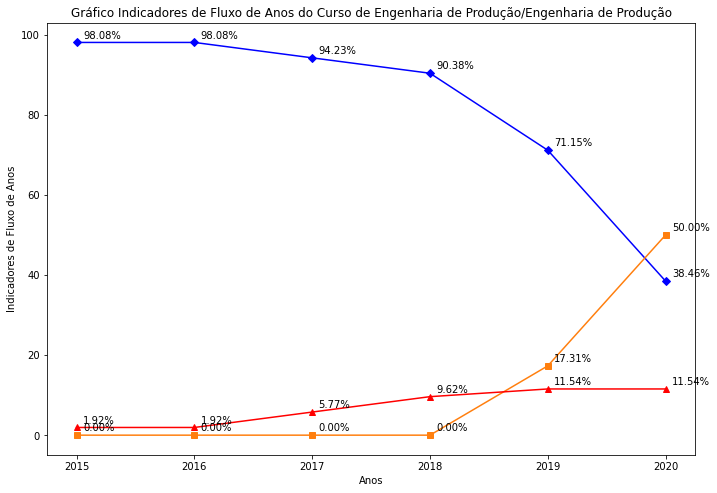


Taxa de Permanência dos Alunos



,t,Taxa de Permanência do Ano t (%),Somatória de Alunos com Vínculos Ativos do Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,94.736842,54,0,57
1,2016,68.421053,39,0,57
2,2017,57.894737,33,0,57
3,2018,49.122807,28,0,57
4,2019,43.859649,25,0,57
5,2020,31.578947,18,0,57




Taxa de Conclusão Acumulada dos Alunos



,t,Taxa de Conclusão Acumulada do Ano T até Ano t (%),Somatória de Alunos Formados do Ano T ate Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,57
1,2016,0.000000,0,0,57
2,2017,0.000000,0,0,57
3,2018,0.000000,0,0,57
4,2019,3.508772,2,0,57
5,2020,15.789474,9,0,57




Taxa de Desistência Acumulada dos Alunos



,t,Taxa de Desistência Acumulada do Ano T até Ano t (%),Somatória de Alunos Transferidos do Ano T até Ano t,Somatória de Alunos Desistentes do Ano T até Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,5.263158,0,3,0,57
1,2016,31.578947,12,6,0,57
2,2017,42.105263,17,7,0,57
3,2018,50.877193,19,10,0,57
4,2019,52.631579,19,11,0,57
5,2020,52.631579,19,11,0,57


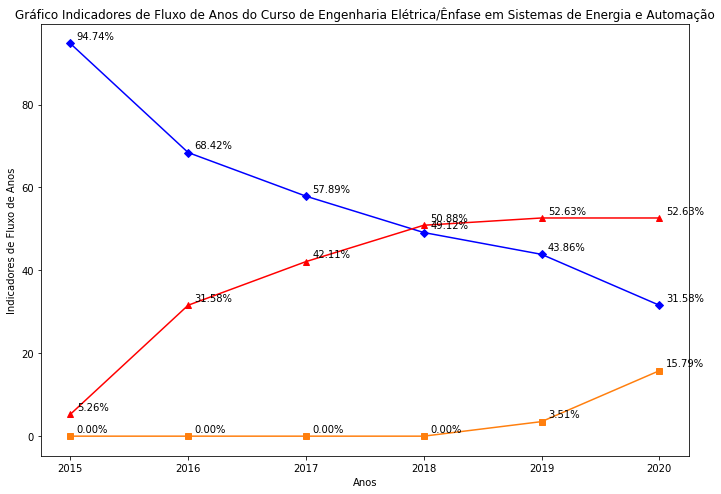


Taxa de Permanência dos Alunos



,t,Taxa de Permanência do Ano t (%),Somatória de Alunos com Vínculos Ativos do Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,100.000000,41,0,41
1,2016,100.000000,41,0,41
2,2017,100.000000,41,0,41
3,2018,100.000000,41,0,41
4,2019,87.804878,36,0,41
5,2020,56.097561,23,0,41




Taxa de Conclusão Acumulada dos Alunos



,t,Taxa de Conclusão Acumulada do Ano T até Ano t (%),Somatória de Alunos Formados do Ano T ate Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,41
1,2016,0.000000,0,0,41
2,2017,0.000000,0,0,41
3,2018,0.000000,0,0,41
4,2019,12.195122,5,0,41
5,2020,41.463415,17,0,41




Taxa de Desistência Acumulada dos Alunos



,t,Taxa de Desistência Acumulada do Ano T até Ano t (%),Somatória de Alunos Transferidos do Ano T até Ano t,Somatória de Alunos Desistentes do Ano T até Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,0,41
1,2016,0.000000,0,0,0,41
2,2017,0.000000,0,0,0,41
3,2018,0.000000,0,0,0,41
4,2019,0.000000,0,0,0,41
5,2020,2.439024,0,1,0,41


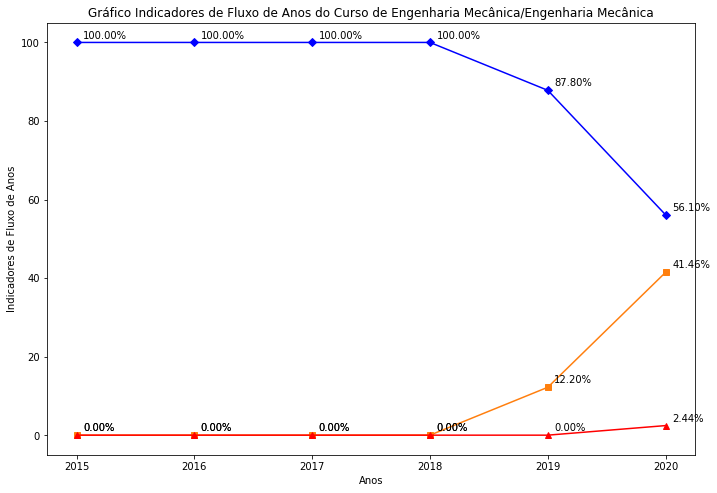


Taxa de Permanência dos Alunos



,t,Taxa de Permanência do Ano t (%),Somatória de Alunos com Vínculos Ativos do Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,97.872340,46,0,47
1,2016,93.617021,44,0,47
2,2017,85.106383,40,0,47
3,2018,76.595745,36,0,47
4,2019,68.085106,32,0,47
5,2020,44.680851,21,0,47




Taxa de Conclusão Acumulada dos Alunos



,t,Taxa de Conclusão Acumulada do Ano T até Ano t (%),Somatória de Alunos Formados do Ano T ate Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,47
1,2016,0.000000,0,0,47
2,2017,2.127660,1,0,47
3,2018,2.127660,1,0,47
4,2019,10.638298,5,0,47
5,2020,34.042553,16,0,47




Taxa de Desistência Acumulada dos Alunos



,t,Taxa de Desistência Acumulada do Ano T até Ano t (%),Somatória de Alunos Transferidos do Ano T até Ano t,Somatória de Alunos Desistentes do Ano T até Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,2.127660,1,0,0,47
1,2016,6.382979,1,2,0,47
2,2017,12.765957,2,4,0,47
3,2018,21.276596,3,7,0,47
4,2019,21.276596,3,7,0,47
5,2020,21.276596,3,7,0,47


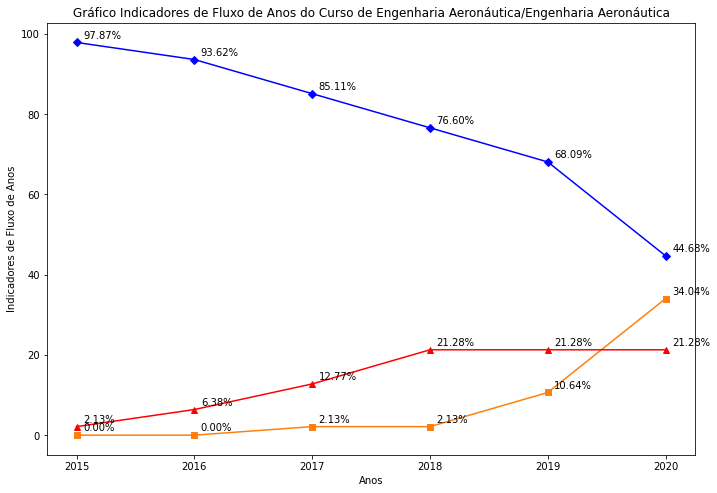


Taxa de Permanência dos Alunos



,t,Taxa de Permanência do Ano t (%),Somatória de Alunos com Vínculos Ativos do Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,98.387097,61,0,62
1,2016,83.870968,52,0,62
2,2017,80.645161,50,0,62
3,2018,79.032258,49,0,62
4,2019,64.516129,40,0,62
5,2020,37.096774,23,0,62




Taxa de Conclusão Acumulada dos Alunos



,t,Taxa de Conclusão Acumulada do Ano T até Ano t (%),Somatória de Alunos Formados do Ano T ate Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,62
1,2016,0.000000,0,0,62
2,2017,0.000000,0,0,62
3,2018,0.000000,0,0,62
4,2019,12.903226,8,0,62
5,2020,40.322581,25,0,62




Taxa de Desistência Acumulada dos Alunos



,t,Taxa de Desistência Acumulada do Ano T até Ano t (%),Somatória de Alunos Transferidos do Ano T até Ano t,Somatória de Alunos Desistentes do Ano T até Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,1.612903,0,1,0,62
1,2016,16.129032,3,7,0,62
2,2017,19.354839,4,8,0,62
3,2018,20.967742,4,9,0,62
4,2019,22.580645,5,9,0,62
5,2020,22.580645,5,9,0,62


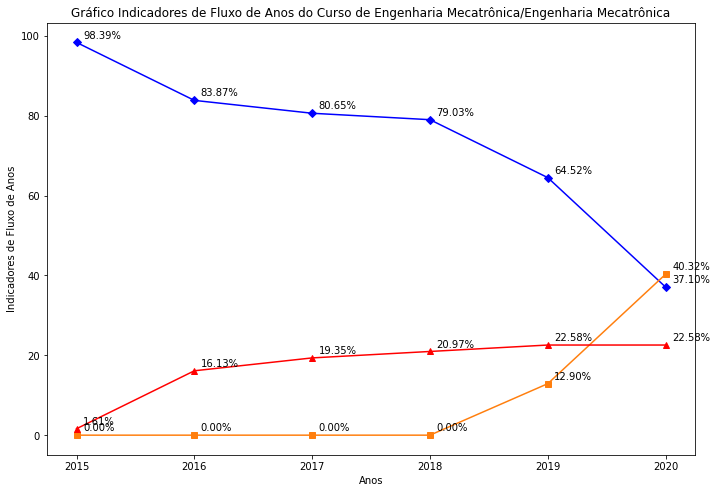


Taxa de Permanência dos Alunos



,t,Taxa de Permanência do Ano t (%),Somatória de Alunos com Vínculos Ativos do Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,100.000000,56,0,56
1,2016,92.857143,52,0,56
2,2017,91.071429,51,0,56
3,2018,87.500000,49,0,56
4,2019,67.857143,38,0,56
5,2020,35.714286,20,0,56




Taxa de Conclusão Acumulada dos Alunos



,t,Taxa de Conclusão Acumulada do Ano T até Ano t (%),Somatória de Alunos Formados do Ano T ate Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,56
1,2016,0.000000,0,0,56
2,2017,0.000000,0,0,56
3,2018,0.000000,0,0,56
4,2019,16.071429,9,0,56
5,2020,48.214286,27,0,56




Taxa de Desistência Acumulada dos Alunos



,t,Taxa de Desistência Acumulada do Ano T até Ano t (%),Somatória de Alunos Transferidos do Ano T até Ano t,Somatória de Alunos Desistentes do Ano T até Ano t,Somatória de Alunos Falecidos do Ano T até Ano t,Somatória de Alunos Ingressados em T
0,2015,0.000000,0,0,0,56
1,2016,7.142857,3,1,0,56
2,2017,8.928571,3,2,0,56
3,2018,12.500000,4,3,0,56
4,2019,16.071429,4,5,0,56
5,2020,16.071429,4,5,0,56


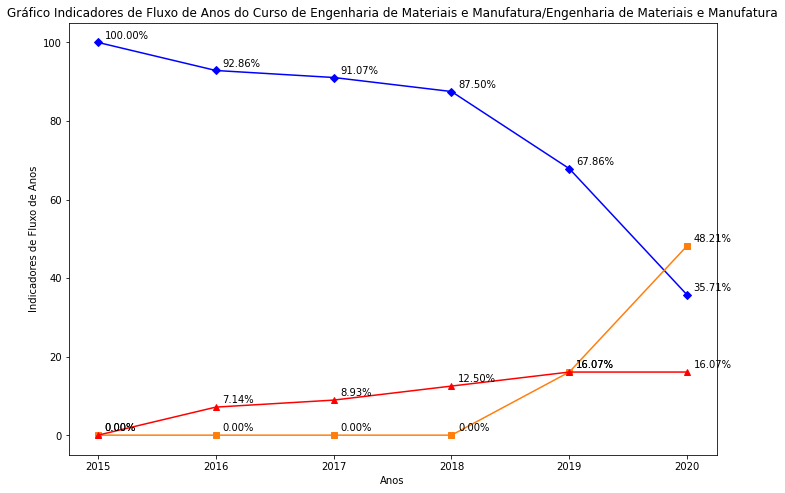

In [ ]:
#print(nomes_dos_cursos_considerados_da_EESC)
for curso in nomes_dos_cursos_considerados_da_EESC:
  calcular_e_plotar_grafico_de_indicadores_de_fluxo_de_varios_anos_para_um_CURSO(2015, curso, [2015,2016,2017,2018,2019,2020],
                                                                                 data_da_geracao_da_tabela = date(2021,4,21), 
                                                                                 data_para_correcao_da_data_de_conclusao = date(9999,5,31))  

###calcular_taxas_de_permanencia_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
---
O objetivo da função é calcular a taxa de permanência de cada ano ao longo dos anos para uma UNIDADE.

In [ ]:
def calcular_taxas_de_permanencia_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela):

  def calcular_taxa_de_permanencia_de_um_ano_para_uma_UNIDADE(t, alunos_ingressados_em_T, somatoria_de_alunos_com_vinculo_ativo_do_ano_t_menos_1):
    
    somatoria_IG_do_ano_T = len(alunos_ingressados_em_T) 
    somatoria_de_Cur_do_ano_t = None # Não é possivel calcular através do banco de dados fornecido
    somatoria_de_mTr_do_ano_t = None # Não é possivel calcular através do banco de dados fornecido
    somatoria_de_alunos_tranferidos_do_ano_t = 0
    somatoria_de_alunos_desistentes_do_ano_t = 0
    somatoria_de_alunos_formados_do_ano_t = 0
    somatoria_de_Fal_do_ano_t = 0
    somatoria_de_Fal_do_ano_T_ate_t = 0

    for ano_de_ingresso, data_de_encerramento, tipo_de_encerramento in alunos_ingressados_em_T:

      if data_de_encerramento != '':

        if t == data_de_encerramento.year:

          if (tipo_de_encerramento.find('Transferência USP')!= -1 or
              tipo_de_encerramento.find('Transferência Externa')!= -1):
              
              somatoria_de_alunos_tranferidos_do_ano_t +=1

          elif (tipo_de_encerramento.find('Abandono 2 semestres sem matrícula')!= -1 or
                tipo_de_encerramento.find('Cancelamento 0 crédito')!= -1 or
                tipo_de_encerramento.find('Cancelamento 0 crédito em dois semestres')!= -1 or
                tipo_de_encerramento.find('Cancelamento menos 20% créd 2 semestres')!= -1 or
                tipo_de_encerramento.find('Cancelamento menos 20% dos créditos')!= -1 or
                tipo_de_encerramento.find('Cancelamento trancamento 4 semestres')!= -1 or
                tipo_de_encerramento.find('Desistência a pedido')!= -1 or
                tipo_de_encerramento.find('Ingressante sem Frequência')!= -1 or
                tipo_de_encerramento.find('Encerramento novo ingresso')!= -1 or
                tipo_de_encerramento.find('Cancelamento outras IES (Lei Federal)')!= -1 or
                tipo_de_encerramento.find('Não cumpriu normas Decreto (PEC-G)')!= -1 or
                tipo_de_encerramento.find('Opção Currículo')!= -1 or
                tipo_de_encerramento.find('Liminar cassada')!= -1):
            
            somatoria_de_alunos_desistentes_do_ano_t +=1
          
          elif (tipo_de_encerramento.find('Conclusão')!= -1 or
                tipo_de_encerramento.find('Término')!= -1):
            
            somatoria_de_alunos_formados_do_ano_t +=1
          
          elif tipo_de_encerramento.find('Falecimento') != -1:
            somatoria_de_Fal_do_ano_t +=1
          
        if t >= data_de_encerramento.year and tipo_de_encerramento.find('Falecimento') != -1:
          somatoria_de_Fal_do_ano_T_ate_t +=1

    somatoria_de_alunos_com_vinculo_ativo_no_ano_t = (somatoria_de_alunos_com_vinculo_ativo_do_ano_t_menos_1
                                                                  - somatoria_de_alunos_tranferidos_do_ano_t
                                                                  - somatoria_de_alunos_desistentes_do_ano_t
                                                                  - somatoria_de_alunos_formados_do_ano_t
                                                                  - somatoria_de_Fal_do_ano_t)
    
    taxa_de_permanencia_do_ano_t = ( somatoria_de_alunos_com_vinculo_ativo_no_ano_t / (somatoria_IG_do_ano_T - somatoria_de_Fal_do_ano_T_ate_t)) * 100 

    dados_calculados_do_ano_t = {
      't' : t,
      'taxa_de_permanencia_do_ano_t' : taxa_de_permanencia_do_ano_t,
      'somatoria_de_alunos_com_vinculo_ativo_no_ano_t' : somatoria_de_alunos_com_vinculo_ativo_no_ano_t,
      'somatoria_de_alunos_tranferidos_do_ano_t' : somatoria_de_alunos_tranferidos_do_ano_t,
      'somatoria_de_alunos_desistentes_do_ano_t' : somatoria_de_alunos_desistentes_do_ano_t,
      'somatoria_de_alunos_formados_do_ano_t' : somatoria_de_alunos_formados_do_ano_t ,
      'somatoria_de_Fal_do_ano_t' : somatoria_de_Fal_do_ano_t,
      'somatoria_de_Fal_do_ano_T_ate_t' : somatoria_de_Fal_do_ano_T_ate_t,
      'somatoria_IG_do_ano_T' : somatoria_IG_do_ano_T,
    }

    return dados_calculados_do_ano_t


  #-------------------------Conteúdo da Função Principal ------------------------------

  tS = anos_de_referencia 

  if (data_da_geracao_da_tabela.day < 31 or data_da_geracao_da_tabela.month < 12) and max(tS) >= data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data diferente de 31/12/ano, todo ano de referência deve ser menor que o ano da data de geração da tabela.'}
  
  elif (data_da_geracao_da_tabela.day == 31 and data_da_geracao_da_tabela.month == 12) and max(tS) > data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data igual a 31/12/ano, todo ano de referência deve ser menor ou igual ao ano da data de geração da tabela.'}
    
  dados_calculados_de_anos = []

  taxas_de_permanencia_de_anos = []

  somatoria_de_alunos_com_vinculo_ativo_do_ano_t_menos_1 = len(alunos_ingressados_em_T) # Essa atribuição é feita pois no ano T, não existe t-1

  for t in tS:

    dados_calculados_do_ano_t = calcular_taxa_de_permanencia_de_um_ano_para_uma_UNIDADE(t, alunos_ingressados_em_T, somatoria_de_alunos_com_vinculo_ativo_do_ano_t_menos_1)

    dados_calculados_de_anos.append(dados_calculados_do_ano_t)

    taxas_de_permanencia_de_anos.append(dados_calculados_do_ano_t['taxa_de_permanencia_do_ano_t'])

    somatoria_de_alunos_com_vinculo_ativo_do_ano_t_menos_1 = dados_calculados_do_ano_t['somatoria_de_alunos_com_vinculo_ativo_no_ano_t']

    dados_calculados_de_anos_por_categoria = {
      't' : [ ],
      'Taxa de Permanência do Ano t (%)' : [] ,
      'Somatória de Alunos com Vínculo Ativo do Ano t' : [] ,
      'Somatória de Alunos Transferidos(Externa e USP) do Ano t' : [] ,
      'Somatória de Alunos Desistentes do Ano t' : [] ,
      'Somatória de Alunos Formados do Ano t' : [] ,
      'Somatória de Alunos Falecidos do Ano t' : [],
      'Somatória de Alunos Falecidos do Ano T até Ano t' : [],
      'Somatória de Alunos Ingressados em T': [] 
    }

  for dados_calculados_do_ano_t in dados_calculados_de_anos:

    dados_calculados_de_anos_por_categoria ['t'].append(dados_calculados_do_ano_t['t'])
    dados_calculados_de_anos_por_categoria ['Taxa de Permanência do Ano t (%)'].append(dados_calculados_do_ano_t['taxa_de_permanencia_do_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos com Vínculo Ativo do Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_com_vinculo_ativo_no_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Transferidos(Externa e USP) do Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_tranferidos_do_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Desistentes do Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_desistentes_do_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Formados do Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_formados_do_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Falecidos do Ano t'].append(dados_calculados_do_ano_t['somatoria_de_Fal_do_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Falecidos do Ano T até Ano t'].append(dados_calculados_do_ano_t['somatoria_de_Fal_do_ano_T_ate_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Ingressados em T'].append(dados_calculados_do_ano_t['somatoria_IG_do_ano_T'])

  gerar_tabela_para_validar_dados(dados_calculados_de_anos_por_categoria, 'Taxa de Permanência dos Alunos', False)

  return {'estado':True, 'resposta':taxas_de_permanencia_de_anos}

###calcular_e_plotar_grafico_de_taxas_de_permanencia_de_varios_anos_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela)
---
O objetivo da função é criar um gráfico para uma UNIDADE contendo a taxa de permanência para cada ano ao longo dos anos. Para isso utiliza a função definida no código anterior para realizar os cálculos.

In [ ]:
def calcular_e_plotar_grafico_de_taxas_de_permanencia_de_varios_anos_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, codigo_da_unidade, anos_de_referencia, data_da_geracao_da_tabela, data_para_correcao_da_data_de_conclusao):
  
  alunos_ingressados_em_T = tratar_e_retornar_dados_de_alunos_ingressados_em_T_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, codigo_da_unidade, data_para_correcao_da_data_de_conclusao)
  
  resposta_da_funcao = calcular_taxas_de_permanencia_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  
  if resposta_da_funcao['estado'] == False:
    print(resposta_da_funcao['resposta'])
    return

  taxas_de_permanencia_de_anos = resposta_da_funcao['resposta']

  figure = plt.figure(figsize = (9,6))
  axe = figure.add_axes([0,0,1,1])
  axe.plot(anos_de_referencia, taxas_de_permanencia_de_anos, 'D-b')
  axe.set_xlabel('Anos')
  axe.set_ylabel('Taxas de Permanência de Anos')
  axe.set_title('Gráfico de Taxas de Permanência de Anos da unidade '+codigo_da_unidade)

  incremento_x = (axe.get_xlim()[1] - axe.get_xlim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo x, proporcional ao tamanho do eixo X
  incremento_y = (axe.get_ylim()[1] - axe.get_ylim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo y, proporcional ao tamanho do eixo Y

  # Utilizando função text do módulo pyplot para inserir textos em coordenadas no gráfico.
  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_permanencia_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))

  plt.show()

In [ ]:
#Testes
#print(nomes_dos_cursos_considerados_da_EESC)
calcular_e_plotar_grafico_de_taxas_de_permanencia_de_varios_anos_para_uma_UNIDADE(2015, '18', [2015,2016,2017,2018,2019,2020],
                                                                                 data_da_geracao_da_tabela = date(2021,4,21), 
                                                                                 data_para_correcao_da_data_de_conclusao = date(9999,5,31))

###calcular_taxas_de_conclusao_acumulada_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
---
O objetivo da função é calcular a taxa de conclusão acumulada de cada ano ao longo dos anos para uma UNIDADE.

In [ ]:
def calcular_taxas_de_conclusao_acumulada_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela):

  def calcular_taxa_de_conclusao_acumulada_de_um_ano_para_uma_UNIDADE(t, alunos_ingressados_em_T):
    
    somatoria_IG_do_ano_T = len(alunos_ingressados_em_T)
    somatoria_de_alunos_formados_do_ano_T_ate_ano_t = 0
    somatoria_de_Fal_do_ano_T_ate_ano_t = 0 

    for ano_de_ingresso, data_de_encerramento, tipo_de_encerramento in alunos_ingressados_em_T:

      if data_de_encerramento != '':

        if t >= data_de_encerramento.year:

          if (tipo_de_encerramento.find('Conclusão')!= -1 or
                tipo_de_encerramento.find('Término')!= -1):
                  somatoria_de_alunos_formados_do_ano_T_ate_ano_t +=1
          
          elif tipo_de_encerramento.find('Falecimento') != -1:
            somatoria_de_Fal_do_ano_T_ate_ano_t +=1

    taxa_de_conclusao_acumulada_do_ano_T_te_ano_t = ( somatoria_de_alunos_formados_do_ano_T_ate_ano_t 
    / ( somatoria_IG_do_ano_T - somatoria_de_Fal_do_ano_T_ate_ano_t ) ) * 100

    dados_calculados_do_ano_t = {
    't' : t,
    'taxa_de_conclusao_acumulada_do_ano_T_te_ano_t' : taxa_de_conclusao_acumulada_do_ano_T_te_ano_t,
    'somatoria_de_Fal_do_ano_T_ate_ano_t' : somatoria_de_Fal_do_ano_T_ate_ano_t,
    'somatoria_IG_do_ano_T' : somatoria_IG_do_ano_T
    }
    return dados_calculados_do_ano_t

  #-------------------------Conteúdo da Função Principal ------------------------------
  tS = anos_de_referencia
  
  if(data_da_geracao_da_tabela.day < 31 or data_da_geracao_da_tabela.month < 12) and max(tS) >= data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data diferente de 31/12/ano, todo ano de referência deve ser menor que o ano da data de geração da tabela.'}
  
  elif (data_da_geracao_da_tabela.day == 31 and data_da_geracao_da_tabela.month == 12) and max(tS) > data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data igual a 31/12/ano, todo ano de referência deve ser menor ou igual ao ano da data de geração da tabela.'}

  dados_calculados_de_anos = []

  taxas_de_conclusao_acumulada_de_anos = []

  for t in tS:

    dados_calculados_do_ano_t = calcular_taxa_de_conclusao_acumulada_de_um_ano_para_uma_UNIDADE(t, alunos_ingressados_em_T)

    dados_calculados_de_anos.append(dados_calculados_do_ano_t)

    taxas_de_conclusao_acumulada_de_anos.append(dados_calculados_do_ano_t['taxa_de_conclusao_acumulada_do_ano_T_te_ano_t'])

  dados_calculados_de_anos_por_categoria = { #Essa variável é utilizada somente numa função externa para comparar aos dados da tabela já feita
    't' : [] ,
    'Taxa de Conclusão Acumulada do Ano T até Ano t (%)' : [] ,
    'Somatória de Alunos Falecidos do Ano T até Ano t' : [], 
    'Somatória de Alunos Ingressados em T': []
  }

  for dados_calculados_do_ano_t in dados_calculados_de_anos:

    dados_calculados_de_anos_por_categoria ['t'].append(dados_calculados_do_ano_t['t'])
    dados_calculados_de_anos_por_categoria ['Taxa de Conclusão Acumulada do Ano T até Ano t (%)'].append(dados_calculados_do_ano_t['taxa_de_conclusao_acumulada_do_ano_T_te_ano_t'])      
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Falecidos do Ano T até Ano t'].append(dados_calculados_do_ano_t['somatoria_de_Fal_do_ano_T_ate_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Ingressados em T'].append(dados_calculados_do_ano_t['somatoria_IG_do_ano_T'])  
  
  gerar_tabela_para_validar_dados(dados_calculados_de_anos_por_categoria, 'Taxa de Conclusão Acumulada dos Alunos', False)

  return {'estado':True, 'resposta': taxas_de_conclusao_acumulada_de_anos} 

###calcular_e_plotar_grafico_de_taxas_de_conclusao_acumulada_de_varios_anos_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela)
---
O objetivo da função é criar um gráfico para uma UNIDADE contendo a taxa de conclusão acumulada para cada ano ao longo dos anos. Para isso utiliza a função definida no código anterior para realizar os cálculos.

In [ ]:
def calcular_e_plotar_grafico_de_taxas_de_conclusao_acumulada_de_varios_anos_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, codigo_da_unidade, anos_de_referencia, data_da_geracao_da_tabela):
  
  alunos_ingressados_em_T = tratar_e_retornar_dados_de_alunos_ingressados_em_T_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, codigo_da_unidade)
  
  resposta_da_funcao = calcular_taxas_de_conclusao_acumulada_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  
  if resposta_da_funcao['estado'] == False:
    print(resposta_da_funcao['resposta'])
    return

  taxas_de_conclusao_acumulada_de_anos = resposta_da_funcao['resposta']

  figure = plt.figure(figsize = (9,6))
  axe = figure.add_axes([0,0,1,1])
  axe.plot(anos_de_referencia, taxas_de_conclusao_acumulada_de_anos, 's-C1')
  axe.set_xlabel('Anos')
  axe.set_ylabel('Taxas de Conclusão Acumulada de Anos')
  axe.set_title('Gráfico de Taxas de Conclusão Acumulada de Anos da Unidade '+codigo_da_unidade)

  incremento_x = (axe.get_xlim()[1] - axe.get_xlim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo x, proporcional ao tamanho do eixo X
  incremento_y = (axe.get_ylim()[1] - axe.get_ylim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo y, proporcional ao tamanho do eixo Y

  # Utilizando função text do módulo pyplot para inserir textos em coordenadas no gráfico.
  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_conclusao_acumulada_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))

  plt.show()

In [ ]:
#Testes
#print(nomes_dos_cursos_considerados_da_EESC)
calcular_e_plotar_grafico_de_taxas_de_conclusao_acumulada_de_varios_anos_para_uma_UNIDADE(2015, '18', [2015,2016,2017,2018,2019,2020],
                                                                                 data_da_geracao_da_tabela = date(2021,4,21), 
                                                                                 data_para_correcao_da_data_de_conclusao = date(9999,5,31))

###calcular_taxas_de_desistencia_acumulada_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
---
O objetivo da função é calcular a taxa de desistência acumulada de cada ano ao longo dos anos para uma UNIDADE.

In [ ]:
def calcular_taxas_de_desistencia_acumulada_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela):

  def calcular_taxa_de_desistencia_acumulada_de_um_ano_para_uma_UNIDADE(t, alunos_ingressados_em_T):
    
    somatoria_IG_do_ano_T = len(alunos_ingressados_em_T) 
    
    somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t = 0

    somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t = 0

    somatoria_de_Fal_do_ano_T_ate_t = 0

    for ano_de_ingresso, data_de_encerramento, tipo_de_encerramento in alunos_ingressados_em_T:

      if data_de_encerramento != '':

        if t >= data_de_encerramento.year:

          if (tipo_de_encerramento.find('Transferência USP')!= -1 or
              tipo_de_encerramento.find('Transferência Externa')!= -1):
            
            somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t +=1

          elif (tipo_de_encerramento.find('Abandono 2 semestres sem matrícula')!= -1 or
                tipo_de_encerramento.find('Cancelamento 0 crédito')!= -1 or
                tipo_de_encerramento.find('Cancelamento 0 crédito em dois semestres')!= -1 or
                tipo_de_encerramento.find('Cancelamento menos 20% créd 2 semestres')!= -1 or
                tipo_de_encerramento.find('Cancelamento menos 20% dos créditos')!= -1 or
                tipo_de_encerramento.find('Cancelamento trancamento 4 semestres')!= -1 or
                tipo_de_encerramento.find('Desistência a pedido')!= -1 or
                tipo_de_encerramento.find('Ingressante sem Frequência')!= -1 or
                tipo_de_encerramento.find('Encerramento novo ingresso')!= -1 or
                tipo_de_encerramento.find('Cancelamento outras IES (Lei Federal)')!= -1 or
                tipo_de_encerramento.find('Não cumpriu normas Decreto (PEC-G)')!= -1 or
                tipo_de_encerramento.find('Opção Currículo')!= -1 or
                tipo_de_encerramento.find('Liminar cassada')!= -1):
            
            somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t +=1
          
          elif tipo_de_encerramento.find('Falecimento') != -1:
            somatoria_de_Fal_do_ano_T_ate_t +=1
          
    taxa_de_desistencia_acumulada_do_ano_T_ate_ano_t = ( ( somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t + somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t )
    / ( somatoria_IG_do_ano_T - somatoria_de_Fal_do_ano_T_ate_t  ) ) * 100
          
    dados_calculados_do_ano_t = {
      't' : t,
      'taxa_de_desistencia_acumulada_do_ano_T_ate_ano_t' : taxa_de_desistencia_acumulada_do_ano_T_ate_ano_t ,
      'somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t' : somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t ,
      'somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t' : somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t,
      'somatoria_de_Fal_do_ano_T_ate_t' : somatoria_de_Fal_do_ano_T_ate_t,
      'somatoria_IG_do_ano_T' : somatoria_IG_do_ano_T,
    }

    return dados_calculados_do_ano_t

  #-------------------------Conteúdo da Função Principal ------------------------------
  
  tS = anos_de_referencia

  if(data_da_geracao_da_tabela.day < 31 or data_da_geracao_da_tabela.month < 12) and max(tS) >= data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data diferente de 31/12/ano, todo ano de referência deve ser menor que o ano da data de geração da tabela.'}
  
  elif (data_da_geracao_da_tabela.day == 31 and data_da_geracao_da_tabela.month == 12) and max(tS) > data_da_geracao_da_tabela.year:
    return {'estado':False, 'resposta':'Erro, no caso de uma data igual a 31/12/ano, todo ano de referência deve ser menor ou igual ao ano da data de geração da tabela.'}

  dados_calculados_de_anos = []

  taxas_de_desistencia_acumulada_de_anos = []

  for t in tS:

    dados_calculados_do_ano_t = calcular_taxa_de_desistencia_acumulada_de_um_ano_para_uma_UNIDADE(t, alunos_ingressados_em_T)

    dados_calculados_de_anos.append(dados_calculados_do_ano_t)

    taxas_de_desistencia_acumulada_de_anos.append(dados_calculados_do_ano_t['taxa_de_desistencia_acumulada_do_ano_T_ate_ano_t'])

  dados_calculados_de_anos_por_categoria = {
    't' : [ ],
    'Taxa de Desistência Acumulada do Ano T até Ano t (%)' : [] ,
    'Somatória de Alunos Transferidos do Ano T até Ano t' : [] ,
    'Somatória de Alunos Desistentes do Ano T até Ano t' : [] ,
    'Somatória de Alunos Falecidos do Ano T até Ano t' : [],
    'Somatória de Alunos Ingressados em T': []
  }

  for dados_calculados_do_ano_t in dados_calculados_de_anos:

    dados_calculados_de_anos_por_categoria ['t'].append(dados_calculados_do_ano_t['t'])
    dados_calculados_de_anos_por_categoria ['Taxa de Desistência Acumulada do Ano T até Ano t (%)'].append(dados_calculados_do_ano_t['taxa_de_desistencia_acumulada_do_ano_T_ate_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Transferidos do Ano T até Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_tranferidos_do_ano_T_ate_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Desistentes do Ano T até Ano t'].append(dados_calculados_do_ano_t['somatoria_de_alunos_desistentes_do_ano_T_ate_ano_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Falecidos do Ano T até Ano t'].append(dados_calculados_do_ano_t['somatoria_de_Fal_do_ano_T_ate_t'])
    dados_calculados_de_anos_por_categoria ['Somatória de Alunos Ingressados em T'].append(dados_calculados_do_ano_t['somatoria_IG_do_ano_T'])
    
  gerar_tabela_para_validar_dados(dados_calculados_de_anos_por_categoria, 'Taxa de Desistência Acumulada dos Alunos', False)

  return {'estado':True, 'resposta':taxas_de_desistencia_acumulada_de_anos}

###calcular_e_plotar_grafico_de_taxas_de_desistencia_acumulada_de_varios_anos_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela)
---
O objetivo da função é criar um gráfico para uma UNIDADE contendo a taxa de desistencia acumulada para cada ano ao longo dos anos. Para isso utiliza a função definida no código anterior para realizar os cálculos.

In [ ]:
def calcular_e_plotar_grafico_de_taxas_de_desistencia_acumulada_de_varios_anos_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, codigo_da_unidade, anos_de_referencia, data_da_geracao_da_tabela, data_para_correcao_da_data_de_conclusao):

  alunos_ingressados_em_T = tratar_e_retornar_dados_de_alunos_ingressados_em_T_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, codigo_da_unidade, data_para_correcao_da_data_de_conclusao)
  
  resposta_da_funcao = calcular_taxas_de_desistencia_acumulada_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  
  if resposta_da_funcao['estado'] == False:
    print(resposta_da_funcao['resposta'])
    return

  taxas_de_desistencia_acumulada_de_anos = resposta_da_funcao['resposta']

  figure = plt.figure(figsize = (9,6))
  axe = figure.add_axes([0,0,1,1])
  axe.plot(anos_de_referencia, taxas_de_desistencia_acumulada_de_anos, '^-r')
  axe.set_xlabel('Anos')
  axe.set_ylabel('Taxas de Desistência Acumulada de Anos')
  axe.set_title('Gráfico de Taxas de Desistência Acumulada de Anos da Unidade '+codigo_da_unidade)

  incremento_x = (axe.get_xlim()[1] - axe.get_xlim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo x, proporcional ao tamanho do eixo X
  incremento_y = (axe.get_ylim()[1] - axe.get_ylim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo y, proporcional ao tamanho do eixo Y

  # Utilizando função text do módulo pyplot para inserir textos em coordenadas no gráfico.
  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_desistencia_acumulada_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))

  plt.show()

In [ ]:
#Testes
#print(nomes_dos_cursos_considerados_da_EESC)
calcular_e_plotar_grafico_de_taxas_de_desistencia_acumulada_de_varios_anos_para_uma_UNIDADE(2015, '18', [2015,2016,2017,2018,2019,2020],
                                                                                    data_da_geracao_da_tabela = date(2021,4,21),
                                                                                    data_para_correcao_da_data_de_conclusao = date(9999,5,31))

###calcular_e_plotar_grafico_de_indicadores_de_fluxo_de_varios_anos_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, nome_do_curso, anos_de_referencia, data_da_geracao_da_tabela)
---
O objetivo da função é criar um gráfico para uma UNIDADE contendo a taxa de permanência, a taxa de conclusão acumulada e a taxa de desistência acumulada para cada ano ao longo dos anos.

In [ ]:
def calcular_e_plotar_grafico_de_indicadores_de_fluxo_de_varios_anos_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, codigo_da_unidade, anos_de_referencia, data_da_geracao_da_tabela, data_para_correcao_da_data_de_conclusao):
  
  alunos_ingressados_em_T = tratar_e_retornar_dados_de_alunos_ingressados_em_T_para_uma_UNIDADE(ano_de_ingresso_dos_alunos, codigo_da_unidade, data_para_correcao_da_data_de_conclusao)
  
  resposta_da_funcao1 = calcular_taxas_de_permanencia_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  resposta_da_funcao2 = calcular_taxas_de_conclusao_acumulada_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  resposta_da_funcao3 = calcular_taxas_de_desistencia_acumulada_de_varios_anos_para_uma_UNIDADE(anos_de_referencia, alunos_ingressados_em_T, data_da_geracao_da_tabela)
  
  if resposta_da_funcao1['estado'] == False:
    print(resposta_da_funcao1['resposta'])
    return
  if resposta_da_funcao2['estado'] == False:
    print(resposta_da_funcao2['resposta'])
    return
  if resposta_da_funcao3['estado'] == False:
    print(resposta_da_funcao3['resposta'])
    return

  taxas_de_permanencia_de_anos = resposta_da_funcao1['resposta']
  
  taxas_de_conclusao_acumulada_de_anos = resposta_da_funcao2['resposta']
  
  taxas_de_desistencia_acumulada_de_anos = resposta_da_funcao3['resposta']

  figure = plt.figure(figsize = (9,6))
  axe = figure.add_axes([0,0,1,1])

  axe.plot(anos_de_referencia, taxas_de_permanencia_de_anos, 'D-b', label = "Taxa de Permanência de Anos")
  axe.plot(anos_de_referencia, taxas_de_conclusao_acumulada_de_anos, 's-C1', label = 'Taxa de Conclusão Acumulada de Anos')
  axe.plot(anos_de_referencia, taxas_de_desistencia_acumulada_de_anos, '^-r', label = 'Taxa de Desistência Acumulada de Anos')

  axe.set_xlabel('Anos')
  axe.set_ylabel('Indicadores de Fluxo de Anos')
  axe.set_title('Gráfico Indicadores de Fluxo de Anos da Unidade '+codigo_da_unidade)

  incremento_x = (axe.get_xlim()[1] - axe.get_xlim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo x, proporcional ao tamanho do eixo X
  incremento_y = (axe.get_ylim()[1] - axe.get_ylim()[0]) * 0.01 # para facilitar visualização dos valores plotados em relação ao eixo y, proporcional ao tamanho do eixo Y

  # Utilizando função text do módulo pyplot para inserir textos em coordenadas no gráfico.
  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_permanencia_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))
  
  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_conclusao_acumulada_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))

  for coordenada_x, coordenada_y in zip(anos_de_referencia, taxas_de_desistencia_acumulada_de_anos):
    plt.text(coordenada_x+incremento_x, coordenada_y+incremento_y, '{:.2f}%'.format(coordenada_y))

  plt.legend()
  plt.show()

In [ ]:
#Testes
#print(nomes_dos_cursos_considerados_da_EESC)
calcular_e_plotar_grafico_de_indicadores_de_fluxo_de_varios_anos_para_uma_UNIDADE(2015, '18', [2015,2016,2017,2018,2019,2020],
                                                                                 data_da_geracao_da_tabela = date(2021,4,21), 
                                                                                 data_para_correcao_da_data_de_conclusao = date(9999,5,31))